In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
cwd = os.getcwd()
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d", 9)
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
%matplotlib inline

SAVEDIR = "../plots/single-site-hubbard"
if not os.path.exists(SAVEDIR):
    os.makedirs(SAVEDIR)

# $\rho(\mu)$

### Electron density $\rho$ for varying chemical potential $\mu$ and temperature $T = \beta^{-1}$, but fixed $U = 4$. 
### As the temperature decreases, a Mott plateau sets in. 
### The Mott insulating gap already seen here is an important feature of the Hubbard model.

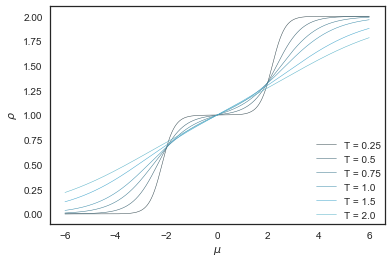

In [8]:
# Set the parameters of the Hubbard model and temperature

U = 4
mu = np.arange(-6, 6, 0.001)
rho = np.zeros(np.size(mu))

t = np.array([0.25, 0.5, 0.75, 1., 1.5, 2.])

fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\rho$')

for T in t:
    for r in range(len(rho)):
        rho[r] = 2 * ( np.exp( (U/4 + mu[r]) / T ) 
                    + np.exp( (2*mu[r] - U/4) / T ) ) / ( np.exp(- U / 4 / T)
                      + 2 * np.exp( (U/4 + mu[r]) / T ) + np.exp( (2*mu[r] - U/4) / T ) )
    ax.plot(mu, rho, label = 'T = ' + str(T), linewidth = 0.5)

    #plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
    #       ncol=2, mode="expand", borderaxespad=0.)
    lgd = ax.legend(loc=4, borderaxespad=0.)
plt.savefig(SAVEDIR + "/rhoVsMu.png", dpi = 600, bbox_extra_artists=(lgd,), bbox_inches='tight')

# $\left\langle m^2 \right\rangle (U)$

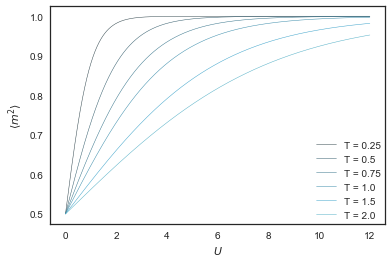

In [9]:
t = np.array([0.25, 0.5, 0.75, 1., 1.5, 2.])

fig = plt.figure(1)
ax = fig.add_subplot(111)

mu = 0
U = np.arange(0, 12, 0.001)
mSq = np.zeros(np.size(U))

plt.ylabel(r'$\left\langle m^2 \right\rangle$')
plt.xlabel(r'$U$')

for T in t:
    for u in range(len(U)):
        mSq[u] = 2 * ( np.exp( (U[u]/4 + mu) / T )\
        + np.exp( (2*mu - U[u]/4) / T ) ) \
        / ( np.exp(- U[u] / 4 / T )+ 2 * np.exp( (U[u] /4 + mu) / T ) + np.exp( (2*mu - U[u]/4) / T ) ) \
        - 2 * np.exp( (2*mu - U[u]/4) / T ) \
        / ( np.exp(- U[u] / 4 / T )+ 2 * np.exp( (U[u] /4 + mu) / T ) + np.exp( (2*mu - U[u]/4) / T ) )
    ax.plot(U, mSq, label = 'T = ' + str(T), linewidth = 0.5)

    #plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
    #       ncol=2, mode="expand", borderaxespad=0.)
    lgd = ax.legend(loc=4, borderaxespad=0.)

plt.savefig(SAVEDIR + "/mSqVsU.png", dpi = 600, bbox_extra_artists=(lgd,), bbox_inches='tight')

# $\left\langle m^2 \right\rangle (T)$ for varying $\mu$

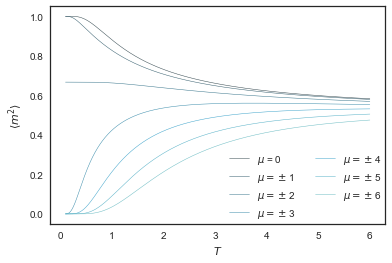

In [11]:
U = 4
mu_s = np.arange(0, 7, 1)
T = np.arange(0.1, 6, 0.001)
mSq = np.zeros(np.size(T))

fig = plt.figure(1)
ax = fig.add_subplot(111)

plt.ylabel(r'$\left\langle m^2 \right\rangle$')
plt.xlabel(r'$T$')

for mu in mu_s:
    for t in range(len(T)):
        mSq[t] = 2 * ( np.exp( (U/4 + mu) / T[t] )\
        + np.exp( (2*mu - U/4) / T[t] ) ) \
        / ( np.exp(- U / 4 / T[t] )+ 2 * np.exp( (U /4 + mu) / T[t] ) + np.exp( (2*mu - U/4) / T[t] ) ) \
        - 2 * np.exp( (2*mu - U/4) / T[t] ) \
        / ( np.exp(- U / 4 / T[t] )+ 2 * np.exp( (U /4 + mu) / T[t] ) + np.exp( (2*mu - U/4) / T[t] ) )
    if mu != 0:
        ax.plot(T, mSq, label = r'$\mu = \pm$' + str(mu), linewidth = 0.5)
    else:
        ax.plot(T, mSq, label = r'$\mu$ = ' + str(mu), linewidth = 0.5)

    #plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
    #       ncol=2, mode="expand", borderaxespad=0.)
    lgd = ax.legend(loc=4, borderaxespad=0., ncol = 2)
plt.savefig(SAVEDIR + "/mSqVsT.png", dpi = 600, bbox_extra_artists=(lgd,), bbox_inches='tight')

# $\left\langle m^2 \right\rangle (T)$ for varying $U$

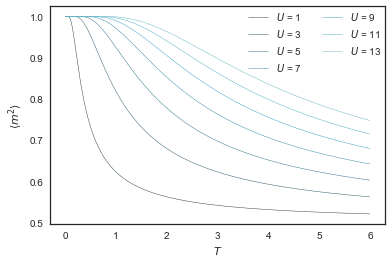

In [14]:
u = np.arange(1, 14, 2)
mu = 0
T = np.arange(0.005, 6, 0.005)
mSq = np.zeros(np.size(T))

fig = plt.figure(1)
ax = fig.add_subplot(111)

plt.ylabel(r'$\left\langle m^2 \right\rangle$')
plt.xlabel(r'$T$')

for U in u:
    for t in range(len(T)):
        mSq[t] = 2 * ( np.exp( (U/4 + mu) / T[t] )\
        + np.exp( (2*mu - U/4) / T[t] ) ) \
        / ( np.exp(- U / 4 / T[t] )+ 2 * np.exp( (U /4 + mu) / T[t] ) + np.exp( (2*mu - U/4) / T[t] ) ) \
        - 2 * np.exp( (2*mu - U/4) / T[t] ) \
        / ( np.exp(- U / 4 / T[t] )+ 2 * np.exp( (U /4 + mu) / T[t] ) + np.exp( (2*mu - U/4) / T[t] ) )
    ax.plot(T, mSq, label = r'$U$ = ' + str(U), linewidth = 0.5)

    #plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
    #       ncol=2, mode="expand", borderaxespad=0.)
    lgd = ax.legend(loc=1, borderaxespad=0., ncol = 2)
plt.savefig(SAVEDIR + "/mSqVsT_and_U.png", dpi = 600, bbox_extra_artists=(lgd,), bbox_inches='tight')